# Advanced plotting

<b>Resources:</b>

Google is your best friend! Searching in english is highly recommended.  


<b>Contents:</b>

    - plotting images, 
    - contour plots and adding colour bars (different colour maps and locations) to images. 
    - Overlaying a scatter plot on top of an image. 
    - multiple sub plots in an image (different sized sub plots, joint axes).

# Plotting images

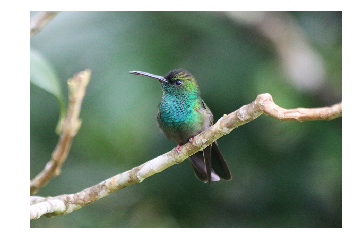

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

image_file = cbook.get_sample_data('/Users/hdenes/Astro/Python_course/hummingbird.png')
image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes
plt.show()

In [18]:
# what are the dimensions of our image?
print(image.shape) 
print(image.shape[0])

(628, 900, 3)
628


## Masking an image

Using <b>matplotlib.patches</b> - this function allows you to define various geometrical shapes.

Resources: https://matplotlib.org/examples/images_contours_and_fields/image_demo_clip_path.html

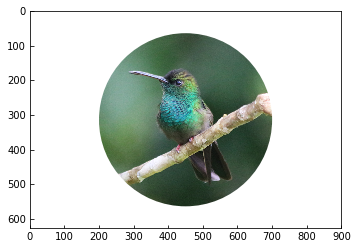

In [67]:
# masking an image
import matplotlib.patches as patches

image_file = cbook.get_sample_data('/Users/hdenes/Astro/Python_course/hummingbird.png')
image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((450, 314), radius=250, transform=ax.transData)
im.set_clip_path(patch)

#ax.axis('off')  # clear x- and y-axes
plt.show()

(628, 900, 3)
628


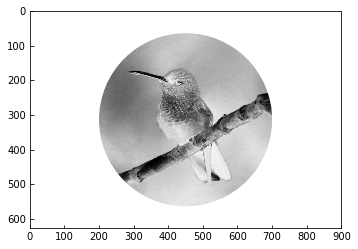

In [69]:
#print(image)

# what are the dimensions of our image?
print(image.shape) 
print(image.shape[0])

fig, ax = plt.subplots()
im = ax.imshow(image[:,:,2], cmap='binary')
patch = patches.Circle((image.shape[1]/2, image.shape[0]/2), radius=250, transform=ax.transData)
im.set_clip_path(patch)

#ax.axis('off')  # clear x- and y-axes
plt.show()

# Contour plots

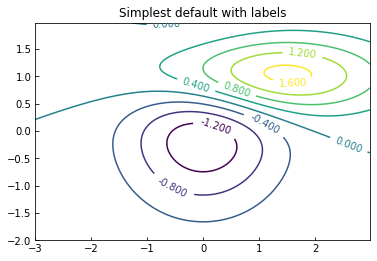

In [22]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = np.arange(-3.0, 3.0,0.025)
y = np.arange(-2.0, 2.0, 0.025)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


plt.show()

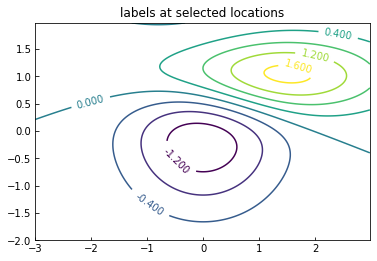

In [23]:
# contour labels can be placed manually by providing list of positions
# (in data coordinate). See ginput_manual_clabel.py for interactive
# placement.
plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')


plt.show()

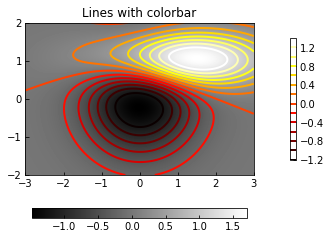

In [36]:
# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines

plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower', cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels, linewidths=2, extent=(-3, 3, -2, 2))

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
plt.hot()  # Now change the colormap for the contour lines and colorbar

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()

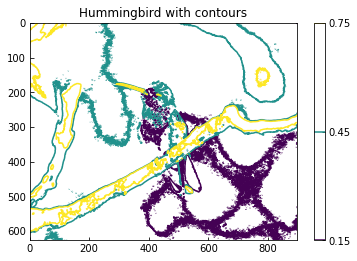

In [77]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.figure()
levels = [0.15, 0.45, 0.75]
CS = plt.contour(image[:,:,0], levels)
#plt.clabel(CS, inline=1, fontsize=10)

plt.title('Hummingbird with contours')
plt.ylim(plt.ylim()[::-1])  #inverts y-axis

# add a colour bar
CB = plt.colorbar(CS, extend='both')   

#controls the colour map
plt.viridis()  

plt.show()